This Notebook is to compare the mean radius column (NaN) values which is calculated using different imputation strategies includes Simple Imputer (mean and mediun imputation) strategy, KNN Imputer, Iterative Imputer/MICE, and Linear regression
Histogram is used for the visualization.

Author : Sangeetha Vijayam
Date : 14-Feb-2025

In [1]:
# import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
# Set NaNs in 12 random rows of 'mean radius'
np.random.seed(42)
nan_rows = np.random.choice(df.index, size=12, replace=False)
df.loc[nan_rows, 'mean radius'] = np.nan

print("\nRows with Introduced Missing Values:")
print(df.loc[nan_rows, ['mean radius']])


Rows with Introduced Missing Values:
     mean radius
204          NaN
70           NaN
131          NaN
431          NaN
540          NaN
567          NaN
369          NaN
29           NaN
81           NaN
477          NaN
457          NaN
167          NaN


In [4]:
# Mean Imputation
df_mean_imputed = df.copy()
imputer_mean = SimpleImputer(strategy='mean')
df_mean_imputed['mean radius'] = imputer_mean.fit_transform(df[['mean radius']])

print("\nMedian Imputation Result:")
print(df_mean_imputed.loc[nan_rows, ['mean radius']])


Median Imputation Result:
     mean radius
204    14.093732
70     14.093732
131    14.093732
431    14.093732
540    14.093732
567    14.093732
369    14.093732
29     14.093732
81     14.093732
477    14.093732
457    14.093732
167    14.093732


In [5]:
# Median Imputation
df_median_imputed = df.copy()
imputer_median = SimpleImputer(strategy='median')
df_median_imputed['mean radius'] = imputer_median.fit_transform(df[['mean radius']])

print("\nMeadian Imputation Result:")
print(df_median_imputed.loc[nan_rows, ['mean radius']])


Meadian Imputation Result:
     mean radius
204         13.3
70          13.3
131         13.3
431         13.3
540         13.3
567         13.3
369         13.3
29          13.3
81          13.3
477         13.3
457         13.3
167         13.3


In [6]:
# KNN Imputation
df_KNN_imputed = df.copy()
knn_imputer = KNNImputer(n_neighbors=5)

df_KNN_imputed['mean radius'] = knn_imputer.fit_transform(df_KNN_imputed[['mean radius']])
print("\nKNN Mean Imputation Result:")
print(df_KNN_imputed.loc[nan_rows, ['mean radius']])



KNN Mean Imputation Result:
     mean radius
204    14.093732
70     14.093732
131    14.093732
431    14.093732
540    14.093732
567    14.093732
369    14.093732
29     14.093732
81     14.093732
477    14.093732
457    14.093732
167    14.093732


In [7]:
# IterativeImputer
df_ITI_imputed = df.copy()

# Initialize IterativeImputer with BayesianRidge estimator
iti_imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)
df_ITI_imputed['mean radius'] = iti_imputer.fit_transform(df_ITI_imputed[['mean radius']])

print("\nIterative Imputer Imputation Result:")
print(df_ITI_imputed.loc[nan_rows, ['mean radius']])


Iterative Imputer Imputation Result:
     mean radius
204    14.093732
70     14.093732
131    14.093732
431    14.093732
540    14.093732
567    14.093732
369    14.093732
29     14.093732
81     14.093732
477    14.093732
457    14.093732
167    14.093732


In [8]:
# Linear Regression
df_Linear_imputed = df.copy()
# Split rows nan and non nan 'mean radius'
train_data = df_Linear_imputed[df_Linear_imputed['mean radius'].notna()]
test_data = df_Linear_imputed[df_Linear_imputed['mean radius'].isna()]

# Split independant variables and target
X_train = train_data.drop(columns=['mean radius'])  # Independant variables
X_test = test_data.drop(columns=['mean radius'])
y_train = train_data['mean radius']                 # Target variable

# Create Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and update only NaN values
predictions = model.predict(X_test)
df_Linear_imputed.loc[df_Linear_imputed['mean radius'].isna(), 'mean radius'] = predictions

In [9]:
df_Linear_imputed.loc[[70,131,204,431,540],'mean radius']

70     18.954564
131    15.502706
204    12.528819
431    12.331452
540    11.540401
Name: mean radius, dtype: float64

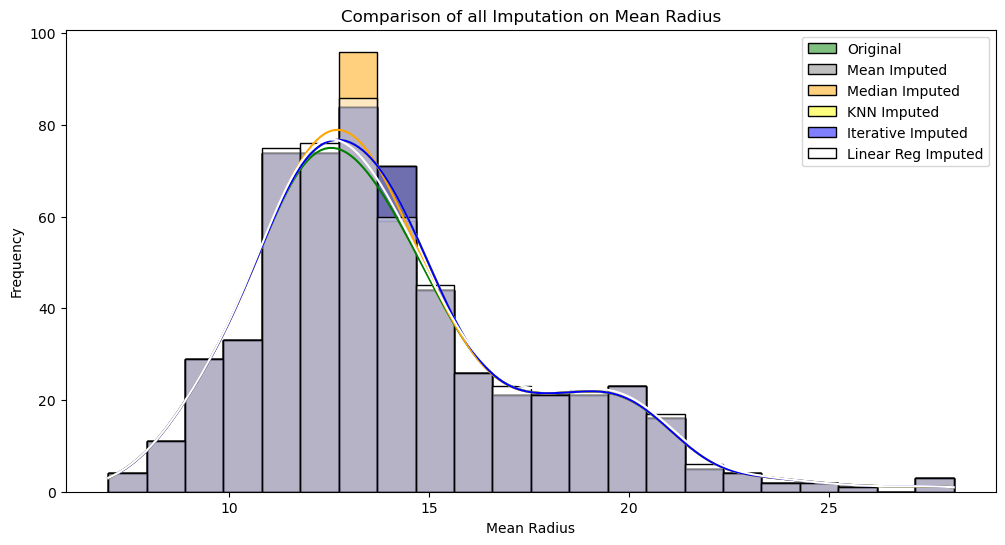

In [10]:
# Visualization: Compare Distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['mean radius'].dropna(), color='green', label='Original', kde=True, alpha=0.5)
sns.histplot(df_mean_imputed['mean radius'], color='grey', label='Mean Imputed', kde=True, alpha=0.5)
sns.histplot(df_median_imputed['mean radius'], color='orange', label='Median Imputed', kde=True, alpha=0.5)
sns.histplot(df_KNN_imputed['mean radius'], color='yellow', label='KNN Imputed', kde=True, alpha=0.5)
sns.histplot(df_ITI_imputed['mean radius'], color='blue', label='Iterative Imputed', kde=True, alpha=0.5)
sns.histplot(df_Linear_imputed['mean radius'], color='white', label='Linear Reg Imputed', kde=True, alpha=0.5)

plt.title('Comparison of all Imputation on Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Interpretation of the Plot:
This histogram compares the distributions of the 'Mean Radius' feature using different imputation methods:

Original (Green) – The original distribution without any imputation.
Mean Imputed (Gray) – Imputation using the mean value.
Median Imputed (Orange) – Imputation using the median value.
KNN Imputed (Yellow) – Imputation using K-Nearest Neighbors.
Iterative Imputed (Blue) – Imputation using Iterative Imputer.
Linear Regression Imputed (White) – Imputation using Linear Regression model predictions.

Impact of Each Imputation Method on Distribution:

Mean Imputation (Gray):
Concentrates the imputed values around the mean, causing a peak at the center of the distribution.
It slightly reduces variability and may introduce bias if the data is skewed.
The distribution becomes more symmetrical, which might not reflect the original data's skewness.

Median Imputation (Orange):
Imputes values at the central location (median) of the distribution.
It preserves the central tendency but causes a localized spike, especially if the data is skewed.
More robust to outliers than mean imputation but may distort the overall shape slightly.

KNN Imputation (Yellow):
Uses the values of neighboring data points to fill in missing values.
It preserves local patterns and variability, leading to a more natural distribution.
The distribution closely follows the original pattern but may smooth out some peaks.

Iterative Imputation (Blue):
Imputes values by modeling each feature as a function of other features.
It preserves the original distribution's shape and variability well.
This method creates a continuous and smooth curve, closely matching the original distribution.

Linear Regression Imputation (White):
Uses predictions from a linear regression model trained on other features.
The imputed values are more spread out and align with the original trend.
It preserves the overall distribution shape but might introduce a slight bias if the relationship between features is non-linear.

Which Imputation Method is Better?

Iterative Imputation (Blue) is the most effective at preserving the original distribution's shape and variability, making it suitable for predictive modeling.

KNN Imputation (Yellow) is also good for maintaining local patterns and variability.
Linear Regression Imputation (White) performs well but may introduce bias if the underlying relationship is non-linear.
Mean (Gray) and Median (Orange) Imputation are simpler but distort the distribution, especially in skewed data.

Conclusion:

For the best approximation of the original distribution, Iterative Imputation is recommended, followed by KNN Imputation.
Linear Regression Imputation is a good choice if the feature relationships are linear.
Use Mean or Median Imputation only for quick fixes or when the data is normally distributed.

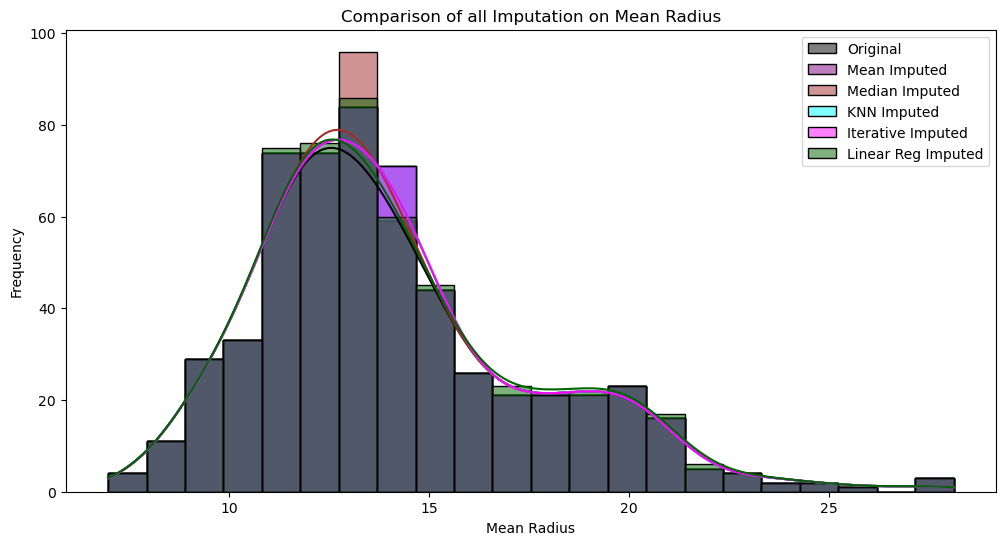

In [11]:
# Visualization: Compare Distributions
plt.figure(figsize=(12, 6))

sns.histplot(df['mean radius'].dropna(), color='black', label='Original', kde=True, alpha=0.5)
sns.histplot(df_mean_imputed['mean radius'], color='purple', label='Mean Imputed', kde=True, alpha=0.5)
sns.histplot(df_median_imputed['mean radius'], color='brown', label='Median Imputed', kde=True, alpha=0.5)
sns.histplot(df_KNN_imputed['mean radius'], color='cyan', label='KNN Imputed', kde=True, alpha=0.5)
sns.histplot(df_ITI_imputed['mean radius'], color='magenta', label='Iterative Imputed', kde=True, alpha=0.5)
sns.histplot(df_Linear_imputed['mean radius'], color='darkgreen', label='Linear Reg Imputed', kde=True, alpha=0.5)

plt.title('Comparison of all Imputation on Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Interpretation and Impact of Imputation Methods on Distribution
This histogram compares the distribution of the 'Mean Radius' feature for different imputation methods:

1. Mean Imputation (Purple)
Impact: Shifts the distribution slightly towards the mean value. It reduces the variance and can create artificial peaks.
Explanation: Mean imputation fills missing values with the average, leading to a concentration around the central value. This distorts the natural distribution, especially if the data is skewed.
When to Use: When data is approximately normally distributed and the mean is a good representation of central tendency.

2. Median Imputation (Brown)
Impact: The median imputation causes spikes at the median value, which is visible as a distinct bar. It preserves the shape better than mean but still introduces artificial peaks.
Explanation: Median imputation is less sensitive to outliers but can distort multimodal distributions.
When to Use: When the data is skewed or contains outliers.

3. KNN Imputation (Cyan)
Impact: The KNN imputed distribution closely follows the original distribution, preserving the shape and variance.
Explanation: KNN uses the values of neighboring points, maintaining local patterns and relationships.
When to Use: When the data has complex patterns or relationships among features.

4. Iterative Imputation (Magenta)
Impact: Iterative imputation preserves the distribution almost identically to the original. It smooths the curve and maintains the natural variance.
Explanation: This method models each feature as a function of the other features iteratively, leading to a more accurate approximation of missing values.
When to Use: When relationships between features are complex and require a model-based approach.

5. Linear Regression Imputation (Green)
Impact: Linear regression imputation follows the original distribution very closely with minimal distortion.
Explanation: It predicts missing values based on linear relationships with other features. It preserves correlations but assumes linearity.
When to Use: When a linear relationship is expected between features.

Based on the plot, the best methods are 
Iterative Imputation and KNN Imputation closely match the original distribution, preserving variance and shape. These methods are recommended for maintaining the natural pattern of the data.

Linear Regression Imputation also performs well, especially when linear relationships exist.

Not Recommended:
Mean and Median Imputation introduce artificial peaks and distort the distribution, potentially leading to biased models.

Conclusion:

For this dataset, Iterative Imputation and KNN Imputation are the best choices as they maintain the original distribution's shape and variance with minimal distortion.

Mean and Median are simpler but less accurate, suitable for quick fixes or when computational efficiency is a priority.